In [1]:

# here we do the necessary imports 
import numpy as np # for doing linear algebra 
import pandas as pd # for EDA
import cv2
import matplotlib.pyplot as plt # for displaying the stats
import tensorflow as tf
from tensorflow.keras.models import Sequential # for creating a model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D # layers for CNN model
import os
# Input data files are available in the "../input/" directory.
import os
print(os.listdir("../input"))




['.DS_Store', 'sampleSubmission.csv', 'test1', 'train']


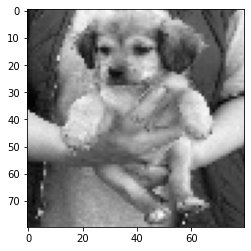

In [2]:
main_dir = "../input/" #indicates to data directory
train_dir = "train" #train data in input
path = os.path.join(main_dir,train_dir) #set the path 

for p in os.listdir(path): 
    category = p.split(".")[0]
    img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)# read the image as array and turns it into grayscale
    new_img_array = cv2.resize(img_array, dsize=(80, 80))# resize the image to 80px by 80px
    plt.imshow(new_img_array,cmap="gray")#show the new image using matplotlib
    break

In [3]:
X=[] #this will be our training array
y=[] # this will be our binary target array(predict 0 or 1)
convert = lambda category : int(category == 'dog') # if the category is dog then convert =1 else 0

"""
--we define a function create_test_data which takes in the path of training dataset
    -- takes all training image into loop
        -- convert the image into array 
        --resize the image to 80,80
        --append the image to training array X
        --append its category to target array y
"""

def create_test_data(path):
    for p in os.listdir(path):
        category = p.split(".")[0]
        category = convert(category)
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array,dsize=(80,80))
        X.append(new_img_array)
        y.append(category)

In [4]:
"""
-- we first append our train data to X and y 
-- we then convert X and y to numpy arrays for further use 

Note: we need to reshape X as we reshape our data into the shape (BATCH SIZE, IMAGE WIDTH, IMAGE HEIGHT, CHANNELS)
    -- Batch size = here we are using full data in one epoch therefore -1
    -- Image Width/Height = 80px as we set it earlier
    -- Channels = 1 as we are using 2d convnet therefore we have only one channel i.e grayscale
    
    
    This is done so that the shape of our data complies with the *input_shape * parameter requirements in Conv2D
"""
#create_test_data(path)
X = np.array(X).reshape(-1, 80,80,1)
y = np.array(y)


In [5]:
"""
we normalize the value of X values 
    -- grayscale lie between 0 and 255 
    -- therefore to bring distribution from 0 to 1 we divide by max value i.e 255
"""
X=X/255.0


In [7]:
"""
-- now we will make our model
    -- define a Sequential model
        -- add an conv2d layer of 64 nodes having a kernel size of (3,3) , 'relu' as acitvation function
        -- after every conv layer we do max pooling with size (2,2)
        -- we add two more layers
        -- we now add a flattening layers with 64 nodes
        
"""
model = Sequential()

#add a densely connected layer with 64 units to the model
model.add(Conv2D(64,(3,3),activation='relu',input_shape=X.shape[1:]))
model.add(MaxPooling2D(pool_size=(2,2)))

#Add two more such layers


model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))


model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

#flatten the layer
model.add(Flatten())


# Add a softmax layer with 10 output units:
model.add(Dense(1, activation='sigmoid'))


# compile the model with adam optimizer and loss as binary_crossentropy and metric as accuracy
model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# now we will fit our model
model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10


(25000, 80, 80, 1)
(25000,)
